In [179]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [180]:
C_M     = 10        # nF/mm^2

### Initial Values
V_INIT  = -65       #mV
M_INIT  = 0.0529
H_INIT  = 0.5961
N_INIT  = 0.3177

### Maximal Conductance
G_L     = 0.003     # mS/mm^2
G_NA    = 1.2       # mS/mm^2
G_K     = 0.36      # mS/mm^2
E_L     = -54.387 # mV
E_K     = -77     # mV
E_NA    = 50      # mV

DT      = 0.01
TOTAL   = 1000

In [181]:
def HudgkinHuxleyModel(I_c2A, T=TOTAL, dt = DT, 
                       V_init=V_INIT, m_init=M_INIT, h_init=H_INIT, n_init=N_INIT,
                       c_m=C_M, g_l=G_L, g_na=G_NA, g_k=G_K, E_l=E_L, E_k=E_K, E_na=E_NA):
    N = int(T/dt)
    V = np.zeros(N);     V[0]=V_init
    i_m = np.zeros(N)
    '''
    alpha_n = np.zero(N); alpha_n[0]=Alpha_N(V_init)
    beta_n = np.zero(N); beta_n[0]=Beta_N(V_init)
    alpha_m = np.zero(N); alpha_m[0]=Alpha_M(V_init)
    beta_m = np.zero(N); beta_m[0]=Beta_M(V_init)
    alpha_h = np.zero(N); alpha_h[0]=Alpha_H(V_init)
    beta_h = np.zero(N); beta_h[0]=Beta_H(V_init)
    '''
    tau_n = np.zeros(N)     
    n_infty = np.zeros(N)  
    tau_m = np.zeros(N)    
    m_infty = np.zeros(N)
    tau_h = np.zeros(N)   
    h_infty = np.zeros(N)  

    n = np.zeros(N);         n[0]=n_init
    m = np.zeros(N);         m[0]=m_init
    h = np.zeros(N);         h[0]=h_init

    for i in range(N-1):
        tau_n[i] = Tau_X(Alpha_N(V[i]), Beta_N(V[i]))
        n_infty[i] = X_Infty(Alpha_N(V[i]), Beta_N(V[i]))
        tau_m[i] = Tau_X(Alpha_M(V[i]), Beta_M(V[i]))
        m_infty[i] = X_Infty(Alpha_M(V[i]), Beta_M(V[i]))
        tau_h[i] = Tau_X(Alpha_H(V[i]), Beta_H(V[i]))
        h_infty[i] = X_Infty(Alpha_H(V[i]), Beta_H(V[i]))

        n[i+1] = n[i] + (dt/tau_n[i])*(n_infty[i]-n[i])
        m[i+1] = m[i] + (dt/tau_m[i])*(m_infty[i]-m[i])
        h[i+1] = h[i] + (dt/tau_h[i])*(h_infty[i]-h[i])

        i_m[i] = (g_l*(V[i]-E_l) + g_k*math.pow(n[i+1],4)*(V[i]-E_k) + g_na*math.pow(m[i+1],3)*h[i+1]*(V[i]-E_na)) * 1000
        V[i+1] = V[i] + (dt/c_m)*(-1*i_m[i] + I_c2A)
        
    t = np.arange(N)*dt
        
    
    return t, V, n, m, h #, tau_n, tau_m, tau_h, n_infty, m_infty, h_infty



def Alpha_N(V):
    if V == -55.0:
        return 0.1
    return 0.01*(V+55)/(1-math.exp(-0.1*(V+55)))

def Beta_N(V):
    return 0.125*math.exp(-0.0125*(V+65))

def Alpha_M(V):
    if V == -40.0:
        return 1.0
    return 0.1*(V+40)/(1-math.exp(-0.1*(V+40)))

def Beta_M(V):
    return 4*math.exp(-0.0556*(V+65))

def Alpha_H(V):
    return 0.07*math.exp(-0.05*(V+65))

def Beta_H(V):
    return 1/(1+math.exp(-0.1*(V+35)))

def Tau_X(Alpha, Beta):
    return 1/(Alpha+Beta)

def X_Infty(Alpha, Beta):
    return Alpha/(Alpha+Beta)
    

a) Use an external current with Ie/A = 200 nA/mm2 and plot V, m, h, and n as functions of time for a suitable interval.

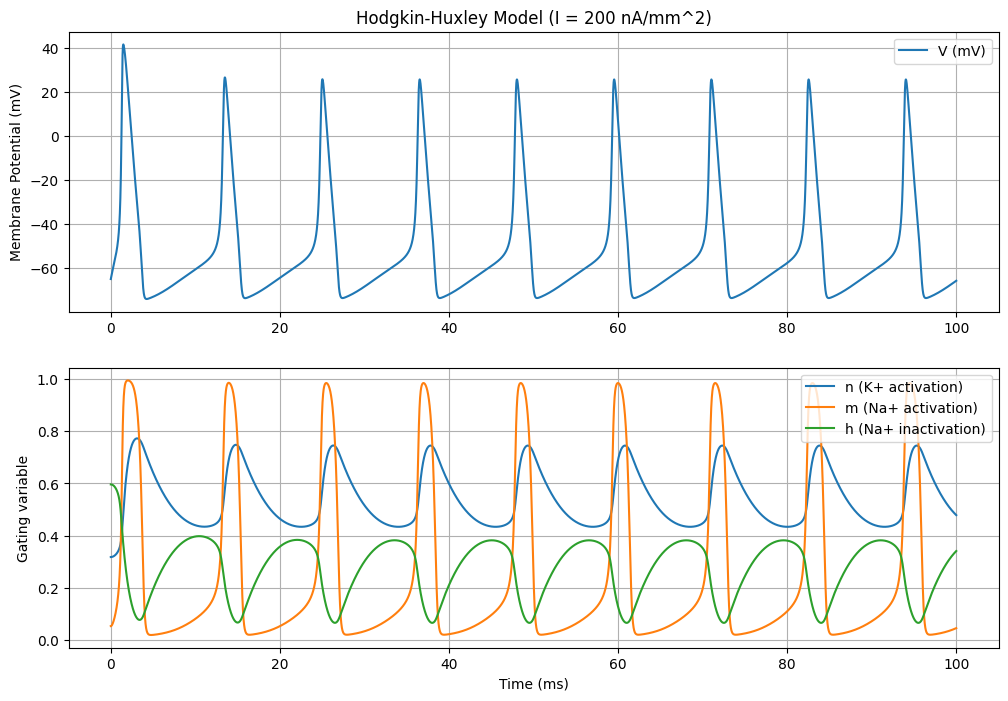

In [182]:
t, V, n, m, h = HudgkinHuxleyModel(200, T=100)

plt.figure(figsize=(12, 8))

plt.subplot(2,1,1)
plt.plot(t, V, label="V (mV)")
plt.ylabel("Membrane Potential (mV)")
plt.title("Hodgkin-Huxley Model (I = 200 nA/mm^2)")
plt.legend()
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(t, n, label="n (K+ activation)")
plt.plot(t, m, label="m (Na+ activation)")
plt.plot(t, h, label="h (Na+ inactivation)")
plt.xlabel("Time (ms)")
plt.ylabel("Gating variable")
plt.legend()
plt.grid(True)

plt.show()

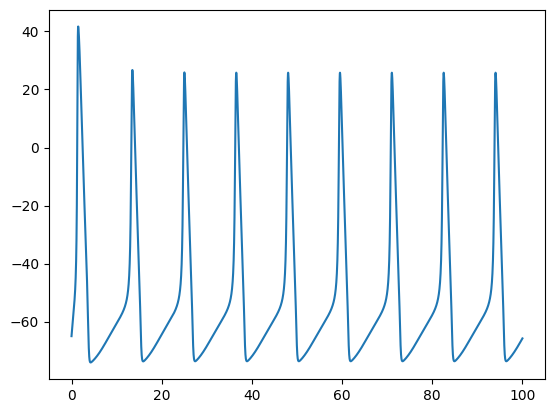

In [183]:
plt.plot(t,V)

b) Plot the firing rate of the model as a function of Ie/A over the range from 0 to 500nA/mm2.

87.0


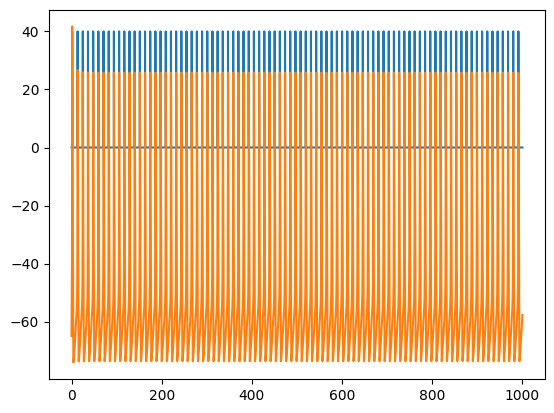

In [184]:
def countSpike(V, T=TOTAL, dt=DT):
    N = int(T/dt)
    r = np.zeros(N)
    
    for i in range(N-2):
        if V[i+1]-V[i] > 0 and V[i+2]-V[i+1] < 0:
            r[i+1] = 1
    
    return r

T=1000

t, V, n, m, h = HudgkinHuxleyModel(200, T=T)

r = countSpike(V, T=T)

plt.plot(t, r*40)
plt.plot(t, V)
print(r.sum())

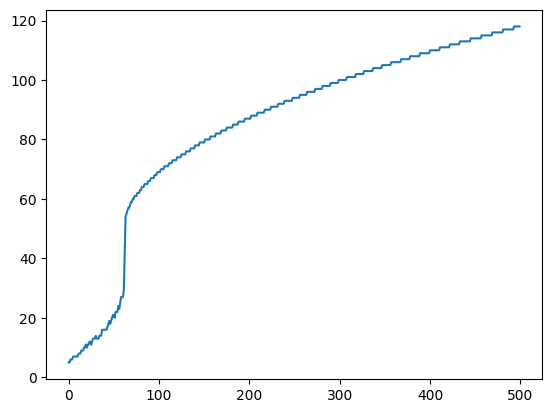

In [185]:
A = np.zeros(500)

for i in range(500):
    t, V, n, m, h = HudgkinHuxleyModel(i, T=1000)
    r = countSpike(V, T=1000)
    
    A[i] = r.sum() 

plt.plot(A)

[]

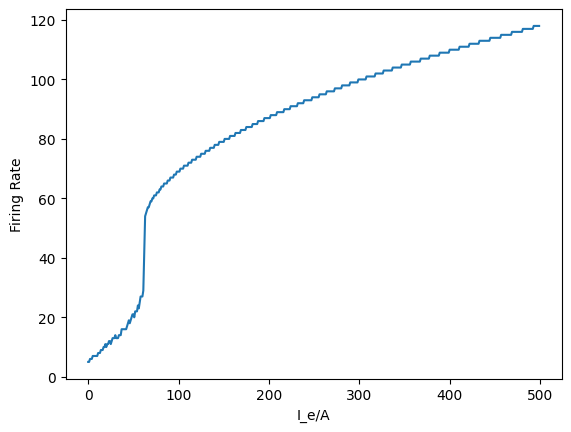

In [188]:
plt.plot(A)
plt.xlabel("I_e/A")
plt.ylabel("Firing Rate")
plt.plot()

c) Apply a pulse of negative current with Ie/A = −50 nA/mm2 for 5 ms followed by Ie/A = 0 and show what happens. Why does this occur?

In [190]:
def HudgkinHuxleyModelModifyCurrent(I_c2A, T=TOTAL, dt = DT, 
                       V_init=V_INIT, m_init=M_INIT, h_init=H_INIT, n_init=N_INIT,
                       c_m=C_M, g_l=G_L, g_na=G_NA, g_k=G_K, E_l=E_L, E_k=E_K, E_na=E_NA):
    N = int(T/dt)
    V = np.zeros(N);     V[0]=V_init
    i_m = np.zeros(N)
    '''
    alpha_n = np.zero(N); alpha_n[0]=Alpha_N(V_init)
    beta_n = np.zero(N); beta_n[0]=Beta_N(V_init)
    alpha_m = np.zero(N); alpha_m[0]=Alpha_M(V_init)
    beta_m = np.zero(N); beta_m[0]=Beta_M(V_init)
    alpha_h = np.zero(N); alpha_h[0]=Alpha_H(V_init)
    beta_h = np.zero(N); beta_h[0]=Beta_H(V_init)
    '''
    tau_n = np.zeros(N)     
    n_infty = np.zeros(N)  
    tau_m = np.zeros(N)    
    m_infty = np.zeros(N)
    tau_h = np.zeros(N)   
    h_infty = np.zeros(N)  

    n = np.zeros(N);         n[0]=n_init
    m = np.zeros(N);         m[0]=m_init
    h = np.zeros(N);         h[0]=h_init

    for i in range(N-1):
        tau_n[i] = Tau_X(Alpha_N(V[i]), Beta_N(V[i]))
        n_infty[i] = X_Infty(Alpha_N(V[i]), Beta_N(V[i]))
        tau_m[i] = Tau_X(Alpha_M(V[i]), Beta_M(V[i]))
        m_infty[i] = X_Infty(Alpha_M(V[i]), Beta_M(V[i]))
        tau_h[i] = Tau_X(Alpha_H(V[i]), Beta_H(V[i]))
        h_infty[i] = X_Infty(Alpha_H(V[i]), Beta_H(V[i]))

        n[i+1] = n[i] + (dt/tau_n[i])*(n_infty[i]-n[i])
        m[i+1] = m[i] + (dt/tau_m[i])*(m_infty[i]-m[i])
        h[i+1] = h[i] + (dt/tau_h[i])*(h_infty[i]-h[i])

        i_m[i] = (g_l*(V[i]-E_l) + g_k*math.pow(n[i+1],4)*(V[i]-E_k) + g_na*math.pow(m[i+1],3)*h[i+1]*(V[i]-E_na)) * 1000
        V[i+1] = V[i] + (dt/c_m)*(-1*i_m[i] + I_c2A[i])
        
    t = np.arange(N)*dt
        
    
    return t, V, n, m, h #, tau_n, tau_m, tau_h, n_infty, m_infty, h_infty

In [ ]:
Duration = 500
I_c2A = np.zeros(int(Duration/DT))
Pulse_Length = 5            #ms
Pulse_Strength = -50        #nA/mm^2

for i in range(int(Pulse_Length/DT)):
    I_c2A[i]=Pulse_Strength

plt.plot()

In [ ]:
t, V, n, m, h = HudgkinHuxleyModelModifyCurrent(200, T=100)

plt.figure(figsize=(12, 8))

plt.subplot(2,1,1)
plt.plot(t, V, label="V (mV)")
plt.ylabel("Membrane Potential (mV)")
plt.title("Hodgkin-Huxley Model (I = 200 nA/mm^2)")
plt.legend()
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(t, n, label="n (K+ activation)")
plt.plot(t, m, label="m (Na+ activation)")
plt.plot(t, h, label="h (Na+ inactivation)")
plt.xlabel("Time (ms)")
plt.ylabel("Gating variable")
plt.legend()
plt.grid(True)

plt.show()